In [62]:
import numpy as np
import pandas as pd
import scipy
import scipy.ndimage
import pickle
import math
from random import randint
from IPython.display import Image
import scipy.io as sio
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import misc
from numpy import linalg
import pandas as pd
import sklearn.metrics as metrics
%matplotlib inline

## Q1. Kmeans

In [3]:
mnist_data = sio.loadmat("hw7_data/mnist_data/images.mat")
mnist_x = mnist_data['images']
mnist_x = np.transpose(mnist_x, (2, 0, 1))
mnist_x = np.reshape(mnist_x, (60000, 28*28))

In [6]:
def distance(x, y):
    result = np.linalg.norm(x * y)**2
    return result

class Kmeans:
    def __init__(self, k, x):
        self.x = x
        self.n = len(x)
        self.k = k
        self.mean = [0] * self.k
        self.labels = np.array([randint(0, k-1) for _ in range(self.n)])

    def train(self, max_step):

        prev_labels = np.zeros(self.n)
        count = 0
        while not np.array_equal(self.labels, prev_labels):
#             print(count)
            prev_labels = np.copy(self.labels)
            # Update mean
            for y in range(self.k):
                indices = np.where(self.labels == y)[0]
                if list(indices):
                    self.mean[y] = np.mean(self.x[indices], axis=0)

            # Update label
            for i in range(self.n):
                new = self.find_closest_label(self.x[i])
                self.labels[i] = new
            
            if count == max_step:
                return
            count += 1

    def find_closest_label(self, x):
        a = []
        for i in range(self.k):
            mean = self.mean[i]
            a.append(distance(x, mean))
        return np.argmin(np.array(a))

In [7]:
k = 5
k5 = Kmeans(k, mnist_x)
k5.train(100)

K = 5
Centers = 
[array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   6.12988734e-03,   4.19151756e-02,
         2.35255136e-02,   8.41616965e-02,   3.44599072e-02,
         6.61033797e-02,   3.31345262e-03,   1.52418820e-02,
         6.77601060e-02,   8.39960239e-02,   7.28959576e-03,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.20941021e-02,   1.72133863e-01,
         3.22895958e-01,   4.54108681e-01,   7.05765408e-01,
         8.65970842e-01,   9.14678595e-01,   1.18290258e+00,
         1.53015242e+00,   1.42826375e+00,   9.28926441e-01,
         5.54340623e-01,   6.39827700e-01,   5.87806494e-01,
      

In [87]:
k = 10
k10 = Kmeans(k, mnist_x)
k10.train(100)

K = 10
Centers = 


In [88]:
k = 20
k20 = Kmeans(k, mnist_x)
k20.train(100)

K = 20
Centers = 


### Visualization

In [89]:
def plot_image(classifier):
    centers = classifier.mean
    for c in centers:
        image = c.reshape((28, 28))
        plt.figure()
        plt.imshow(image, cmap='gray')

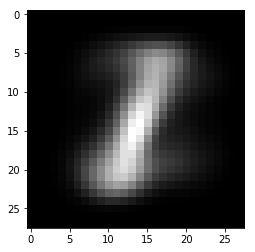

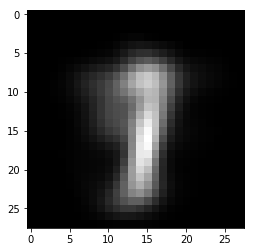

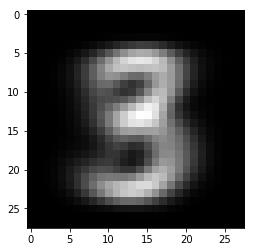

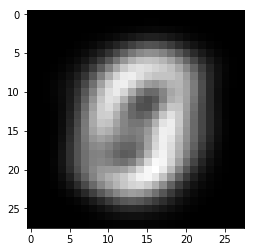

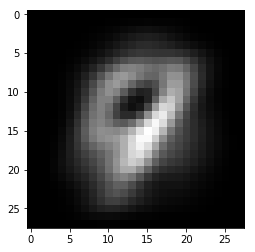

In [90]:
plot_image(k5)

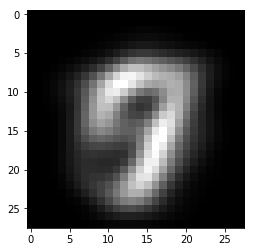

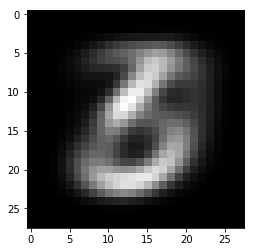

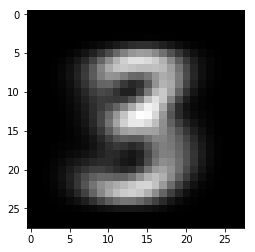

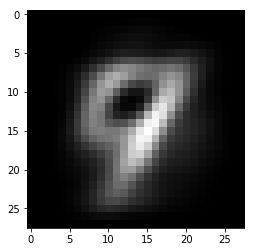

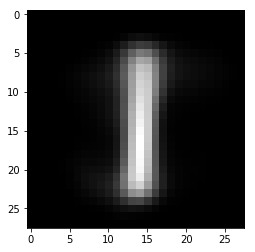

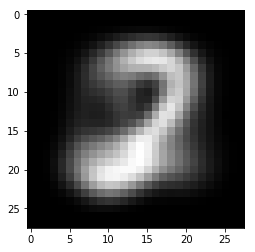

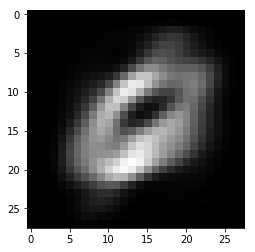

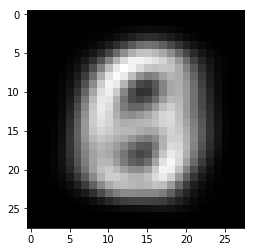

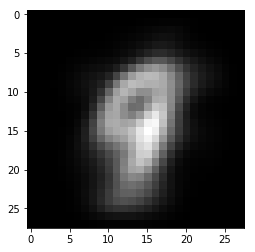

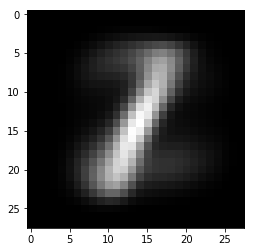

In [91]:
plot_image(k10)

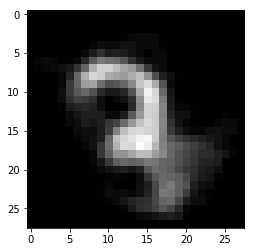

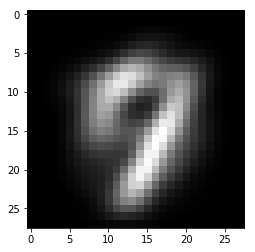

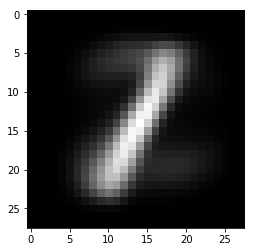

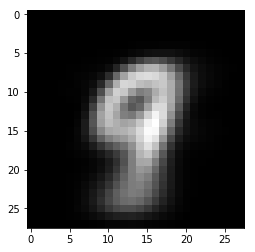

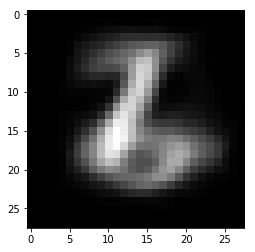

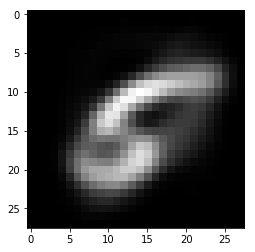

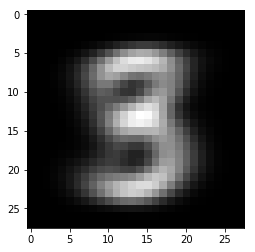

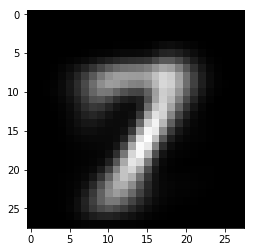

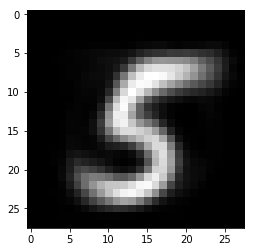

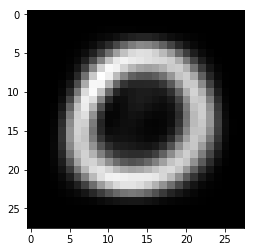

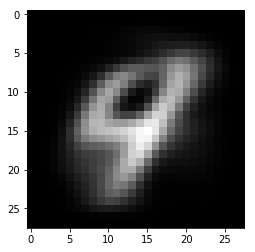

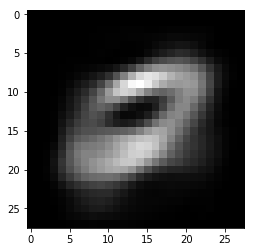

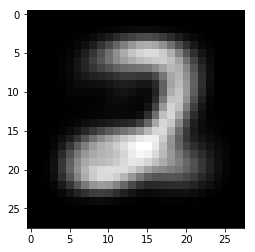

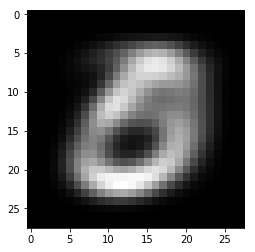

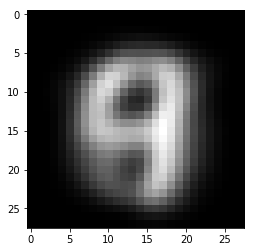

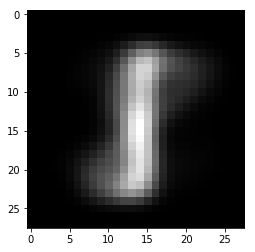

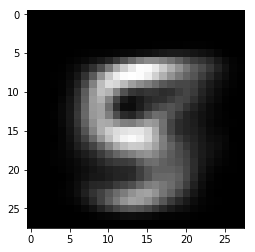

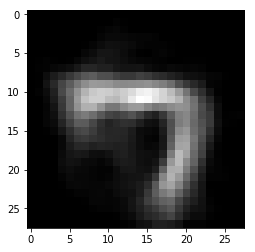

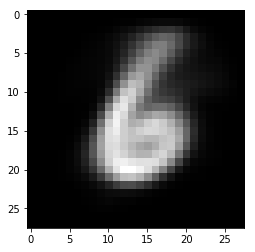

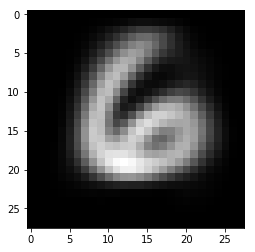

In [92]:
plot_image(k20)

## Q2. Low Rank Approximation

In [31]:
def derank(im, n):
    im2 = np.copy(im)
    im2[n:] = 0
    return im2

def show_rank(n):
    temp = np.matmul(u, np.diag(derank(sig, n)))
    f = np.matmul(temp, v)
    plt.imshow(f, cmap=plt.cm.gray)

def compute_rank(n):
    temp = np.matmul(u, np.diag(derank(sig, n)))
    f = np.matmul(temp, v)
    return f

### a)

In [37]:
face = misc.imread('hw7_data/low-rank_data/face.jpg')
u, sig, v = linalg.svd(face, full_matrices=False)

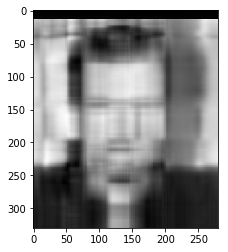

In [22]:
show_rank(5)

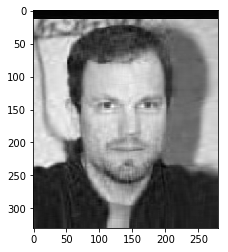

In [23]:
show_rank(20)

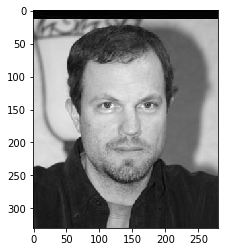

In [24]:
show_rank(100)

### b)

In [29]:
def mse(a, b):
    a = np.reshape(a, (a.shape[0]*a.shape[1],))
    b = np.reshape(b, (b.shape[0]*b.shape[1],))
    result = np.mean((a-b) ** 2)
    return result

def plot_diff(image):
    a = []
    for i in range(1, 101):
        new = compute_rank(i)
        diff = mse(image, new)
        a.append(diff)
    rang = range(1, 101)
    plt.plot(rang, a)

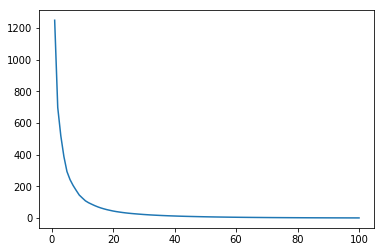

In [34]:
plot_diff(face)

start converge at 50

### c)

In [43]:
sky = misc.imread('hw7_data/low-rank_data/sky.jpg')
u, sig, v = linalg.svd(sky, full_matrices=False)

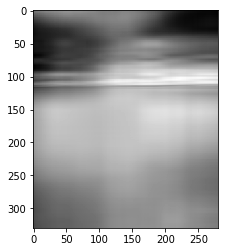

In [26]:
show_rank(5)

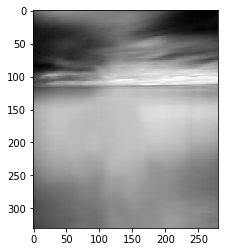

In [27]:
show_rank(20)

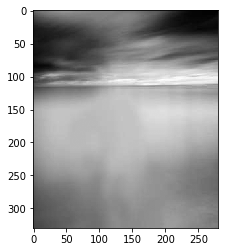

In [28]:
show_rank(100)

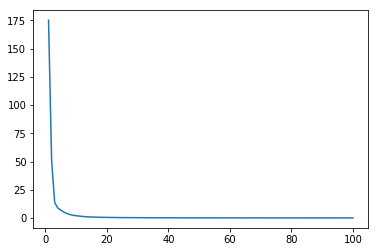

In [36]:
plot_diff(sky)

start converge at 20

### d)

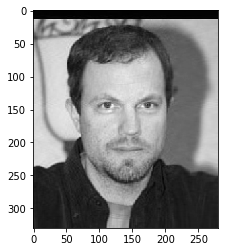

In [42]:
show_rank(50)

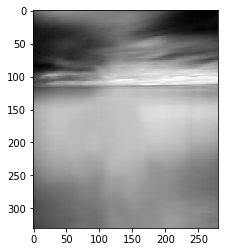

In [44]:
show_rank(20)

Rank 50 for face and rank 20 for sky.  
Face needs a much higher rank to be as clear as the original image, which means it needs more eigenvalues to illustrate the image. We can see in the sky image, white/grey clouds composes the majority of the picture, so there is not much variation.

## Q3. Joke Recommendation

#### a) SVD

In [92]:
train = sio.loadmat("hw7_data/joke_data/joke_train.mat")['train']
train_clean = np.nan_to_num(train)

In [80]:
def SVD(n):
    u, s, v = linalg.svd(train_clean, full_matrices=False)
    sig = np.copy(s)
    sig[n:] = 0
    temp = np.matmul(u, np.diag(sig))
    f = np.matmul(temp, v)
    return f

def validate(pred):
    y_hats, ys = [], []
    f = open("hw7_data/joke_data/validation.txt")
    lines = f.readlines()
    
    for line in lines:
        line = line.strip().split(',')
        u, j, s = int(line[0]), int(line[1]), int(line[2])
        if pred[u - 1][j - 1] > 0:
            l = 1
        else:
            l = 0
        ys.append(l); y_hats.append(s)
        
    acc = np.mean(np.equal().astype(int))
    return acc


In [81]:
for d in [2, 5, 10, 20]:
    pred = SVD(d)
    acc = validate(pred)
    m = mse(pred, train_clean)
    print("d = {}, accuracy = {}, MSE = {}".format(d, acc, m))

d = 2, accuracy = 0.7051490514905149, MSE = 8.331593152468699
d = 5, accuracy = 0.7154471544715447, MSE = 7.711005546787294
d = 10, accuracy = 0.7165311653116531, MSE = 6.970862531482151
d = 20, accuracy = 0.6859078590785908, MSE = 5.790461435296443


### 3.1 Minimize MSE on rated jokes

In [86]:
def update(u, v, d, lam):
    for i in range(u.shape[0]):
        x = np.eye(d) * lam; yt = [0] * d
        for j in range(v.shape[0]):
            old = train[i][j]
            if np.isnan(old):
                pass
            else:
                x += np.outer(v[j], v[j])
                x += v[j] * old 
        u[i] = scipy.linalg.solve(x, y)
        
    for j in range(v.shape[0]):
        x = np.eye(d) * lam; y = [0] * d
        for i in range(u.shape[0]):
            old = train[i][j]
            if np.isnan(old):
                pass
            else:
                x += np.outer(u[i], u[i])
                y += u[i] * old  
        v[j] = scipy.linalg.solve(x, y)
    return u, v


def test(d, max_steps=None, lam=None):
    u, s, v = linalg.svd(train_clean, full_matrices=False)
    u, s, v = u[:, :d], np.diag(s[:d]), v[:d, :].T
#     sig = np.copy(s)
#     sig[d:] = 0
    cu, cp = u.copy(), v.copy()
    for i in range(max_steps):
        update(u, v, d, lam)
        if not (np.allclose(cv, v) or np.allclose(cu, u)):
            cu, cv = u.copy(), v.copy()
        else:
            break
    pred = u.dot(v.T)
    return pred

In [88]:
lam = 200
p = test(10, max_steps=10, lam=200)
acc = validate(p)
print("lam = {}, acc = {}".format(lam, acc))

lam = 10, acc = 0.7024362321623984


In [90]:
lam = 300
p = test(10, max_steps=20, lam=300)
acc = validate(p)
print("lam = {}, acc = {}".format(lam, acc))

lam = 300, acc = 0.7260162601626017


In [91]:
lam = 320
p = test(15, max_steps=20, lam=320)
acc = validate(p)
print("lam = {}, acc = {}".format(lam, acc))

lam = 320, acc = 0.7368962451622910


In [95]:
mse(p, train_clean)

5.5568242949935645


Both MSE and prediction error are lower than 3a

### 3.2 Train and Predict

In [74]:
y = []
f = open("hw7_data/joke_data/query.txt", "r")
lines = f.readlines()
for line in lines:
    line = line.strip().split(',')
    y_hat = p[int(line[1]) - 1][int(line[2]) - 1]
    if y_hat > 0:
        h = 1
    else:
        h = 0
    y.append([int(line[0]), h])

### Kaggle: 0.73156 (Yika)